# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## Goal and business objectives
The goal of this project is to analyze a collected data set of second hand car consumers' behaviour in order to determine which factors consumers use to base their purchases on, presenting these findings to second hand car salespersons in an actionable format.
### Background
The client is a car salesperson interested in knowing which factors drive consumer behaviour in the second hand car market.
### Objective
Give the client actionable information on which features such as car model, color, mileage etc., lead to higher sales prices and create a cost modelling structure to effectively price cars.
### Success Criteria
The success of this modelling effort is an actionable report describing the impact and relative weight in a simplified manner of the different factors taken into consideration. The report is to be constructed in such a manner as to accomodate the client so that an in depth understanding of data science is not required to get actionable output information from the model created. The model should be able to take key factors as input and give a single price output for the expected sales price of the used vehicle.


## Assesment of Situation 
In order to meet these objectives an adequate data set is required to describe the consumer behaviour.
### Inventory of resources
The resource available for this project are limited to the available data set on consumer behaviour for second hand cars and their sales prices.
### Constraints 
The constraints of this modelling effort are the hard deadline of 29th of August 2023, as well as being limited to the usage of this single data set for the creation of the model.


# Project plan
The stages of this project are as follows:
1. Describe the data format and gain an understanding of the data quality including missing values and data types.
2. Search for any apparent correlations between variables and describe the types of trends observed, allowing for later understanding of any trandsformations to the data that may be required.
3. Determine from the data in the previous steps which model types would be applicable to answering the initial business questions with the available data.
4. Develop model based on the previous findings using training data and testing validity using an appropriate metric, this may include further training of the model using techniques such as LOOCV or k-fold cross validation techniques.
5. Validate the model and determine whether the data transformation techniques were correct, checking for model efficacy and itterating model creation steps.
6. Once model has been tested using the chosen methods and found to be of adequate quality, present results in an easy to understand report format.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Collect initial data
Import the data set into a data frame and display the first few rows of the data

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.linear_model import LinearRegression, Lasso
set_config(display="diagram")

filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\machine_learning_practice_data\module_11\data\vehicles.csv')

In [3]:
#print the first five lines of the data 
#print(df.head())
#print the info of the data set
#print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#plot the frequency of each entry in the different columns
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # For numeric columns, create a histogram
        fig = px.histogram(df, x=column, title=f'Histogram of {column}', nbins=20)
    else:
        # For non-numeric columns (categorical), create a bar plot of value counts
        value_counts = df[column].value_counts().reset_index()
        value_counts.columns = [column, 'Frequency']
        fig = px.bar(value_counts, x=column, y='Frequency', title=f'Histogram of {column}')
        fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better visibility
    
    fig.show()

#determine the amount of NaN entries in each column
#print(df.isna().sum())
#print the number of unique entries in each column to determine which may be ignored.
print( df.nunique())

#Get the top 100 most common entries in 'model'
top_models = df['model'].value_counts().head(200).index.tolist()

#Filter the DataFrame to include only the top models
df_top_models = df[df['model'].isin(top_models)]
sorted_top_models = df_top_models['model'].value_counts().index.tolist()

#plot the top models of the 29_000 models in data
fig = px.histogram(df_top_models, x='model', title='Histogram of Top 100 Models',
                   labels={'model': 'Model'}, category_orders={'model': sorted_top_models})

fig.update_xaxes(tickangle=90)
fig.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [42]:
#reviewing data shows that the following columns may be dropped from the initial input data
# id - unecessary and replaced with index value
# region - redundant, the values only need to be grouped by state for the purpose of this model (UPDATE BUSINESS OBJECTIVE)
#cylinders - reduce dimensionality
#paint color, after initial investigation had small effect on efficacy of modelling effort
# model - there are 29000 unique models and will make model fitting more complicated
# VIN - should be a unique value by individual vehicle
#size - addition of size decreased model efficacy within search range 

df_2 = df.drop(columns=['id','model','VIN','paint_color','cylinders','size'])

#reducing the year values to vehicles produced after 1990 (UPDATE THE BUSINESS OBJECTIVE)
df_2 = df_2.loc[df_2['year']>1999]

#for type of cars i want to remove buses offroad and other
df_2 = df_2[~df_2['type'].isin(['other','offroad','bus'])]

#cars under the price of 40,000
df_2 = df_2.loc[(df_2['price']<30000)&(df_2['price']>2000)]

#only include vehicles with clean titles
df_2 = df_2[df_2['title_status'].isin(['clean'])].drop(columns=['title_status'])

#for condition of car reduce dimensionality by only including the following 
conditions_list = ['good','excellent','like new','fair']
df_2 = df_2[df_2['condition'].isin(conditions_list)]

# for odomoter reading only include vehicles with less than 300_000 miles reading
df_2 = df_2[df_2['odometer']<300_000]

#for state, only include the california values 
df_2 = df_2[df_2['state'].isin(['ca'])].drop(columns=['state'])

#only include the gas type cars due to the low amount of other data points
df_2 = df_2[df_2['fuel'].isin(['gas'])].drop(columns=['fuel'])

37
22
            region  price    year manufacturer  condition  odometer  \
21171  bakersfield  16990  2018.0      hyundai       good   16930.0   
21178  bakersfield  27590  2018.0        acura       good   20420.0   
21183  bakersfield  24990  2018.0         audi       good   24116.0   
21191  bakersfield  13999  2010.0        lexus  excellent  115012.0   
21196  bakersfield  12995  2012.0       toyota   like new   80410.0   

      transmission drive   type  
21171        other   fwd  sedan  
21178        other   fwd  sedan  
21183        other   fwd  sedan  
21191    automatic   rwd    SUV  
21196    automatic   fwd  sedan  


In [96]:
#plotting the manufacturers data it appears that approx %50 of the brands compose %90 of the recorded data

#assuming that the salesperson is selling one these brands is useful for dimensionality reduction
# Calculate the cumulative sum for the manufacturer column
cumulative_sum = df_2['manufacturer'].value_counts().sort_values(ascending=False).cumsum()
cumulative_sum = cumulative_sum/len(df_2)

brands = cumulative_sum[cumulative_sum < 0.9]
brands = brands.index.tolist()
print(df_2['manufacturer'].nunique())


df_2 = df_2[df_2['manufacturer'].isin(brands)]
print(df_2['manufacturer'].nunique())


22
16


In [97]:
#drop all remaining NaN values from the data frame
df_2 = df_2.dropna()
print(df_2.head())
print(df_2.info())
print(df_2.nunique())

            region  price    year manufacturer  condition  odometer  \
21171  bakersfield  16990  2018.0      hyundai       good   16930.0   
21183  bakersfield  24990  2018.0         audi       good   24116.0   
21191  bakersfield  13999  2010.0        lexus  excellent  115012.0   
21196  bakersfield  12995  2012.0       toyota   like new   80410.0   
21200  bakersfield  23990  2013.0        lexus       good   39664.0   

      transmission drive   type  
21171        other   fwd  sedan  
21183        other   fwd  sedan  
21191    automatic   rwd    SUV  
21196    automatic   fwd  sedan  
21200        other   rwd  sedan  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 21171 to 71783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9490 non-null   object 
 1   price         9490 non-null   int64  
 2   year          9490 non-null   float64
 3   manufacturer  9490 non-null   object 


In [45]:
#using one hot encoder for the following columns:
#['region','manufacturer','fuel','transmission','drive','type']
df_2_encoded = pd.get_dummies(df_2, columns=['manufacturer','transmission','drive','type','region'])

#using categorical data type for the condition of the cars
conditions_order = ['fair','good','excellent','like new']
df_2_encoded['condition'] = df_2['condition'].apply(lambda x: conditions_order.index(x))


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [99]:
#to set up initial model i want to create a test and train group
df_train, df_test = train_test_split(df_2_encoded, test_size=0.3)

#create the X and y training and test data sets
X = df_2_encoded.drop(columns=['price'])
y = df_2_encoded['price']

X_train = df_train.drop(columns=['price'])
y_train = df_train['price']

X_test = df_test.drop(columns=['price'])
y_test = df_test['price']
#sns.kdeplot(data=df_train,x='year',y='price')


12702393.282016039
12861772.516447205


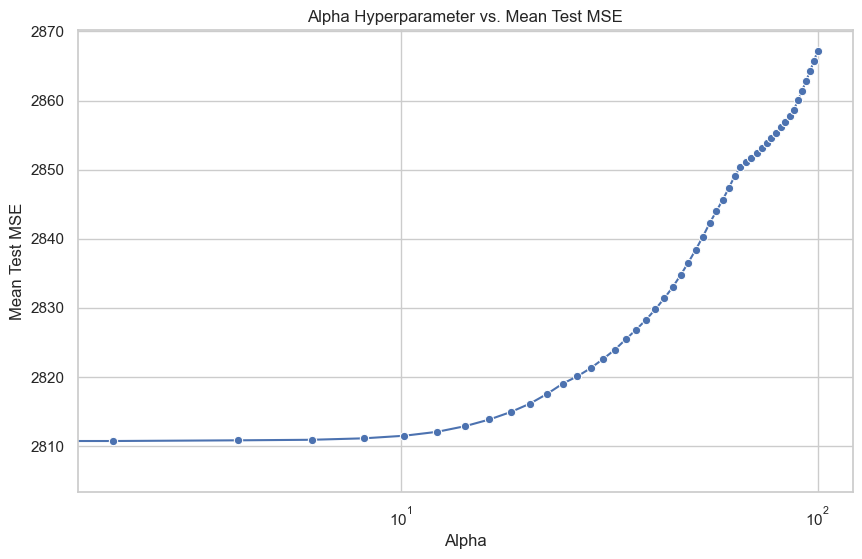

In [143]:
#observing the output when applying a lasso type regression using a gridsearchCV approach
#using a lasso regression with selected columns of order specified in poly_columns
degree_in = 2
poly_columns = ['year','odometer','condition']

#creating a preprocessor so that the specified columns are third order
preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=degree_in, include_bias=False), poly_columns)
    ],
    remainder='passthrough'
)

#create a pipeline using the polynomial features from preprocessor
#standard scaler to decrease large number effects of year and odometer
#using a lasso regression type to optimize for l2
lasso_pipe = Pipeline([
    ('pre_processor',preprocessor),
    ('scaler', StandardScaler()),
    ('lasso',Lasso())  
])

#set the param dictionary for alpha values to search over
param_dict = {'lasso__alpha':np.linspace(0,100,50)}

#creating a gridsearch cv object to find best results over range of alphas
#using a k-fold of n=5
lasso_grid = GridSearchCV(estimator=lasso_pipe,
                         param_grid = param_dict,
                         scoring='neg_mean_absolute_error',
                         cv=5)

#train the model output
lasso_grid.fit(X,y)
train_mse = mean_squared_error(y_train,lasso_grid.predict(X_train))
test_mse = mean_squared_error(y_test,lasso_grid.predict(X_test))

print(f'The training MSE of this model is: {train_mse}')
print(f'The test MSE of this model is: {test_mse}')


# Store the grid search results in a DataFrame
results = pd.DataFrame({'alpha': lasso_grid.cv_results_['param_lasso__alpha'],
                        'mean_test_mae': -lasso_grid.cv_results_['mean_test_score']})

# Plot using Seaborn lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='alpha', y='mean_test_mae', data=results, marker='o')
plt.title('Alpha Hyperparameter vs. Mean Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Test MAE')
plt.xscale('log')  # Use a logarithmic scale for the x-axis (alpha values)
plt.show()


In [146]:
# assigning the best fitted model from the estimator
best_model = lasso_grid.best_estimator_

# assign the determined coefficients
coefficients = best_model.named_steps['lasso'].coef_
feature_names = best_model.named_steps['pre_processor'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature':feature_names,'coef':coefficients})
features = lasso_df.loc[lasso_df['coef'] != 0]
print(f'The features from the lasso regression are the following:\n {features}')

The features from the lasso regression are the following:
                              feature         coef
0                         poly__year  5181.870542
1                     poly__odometer -2936.256707
2                    poly__condition   251.810928
3                       poly__year^2 -1349.793257
4                poly__year odometer -1774.413623
..                               ...          ...
71        remainder__region_stockton   146.677629
72      remainder__region_susanville   123.370003
73  remainder__region_ventura county  -139.725606
74  remainder__region_visalia-tulare    43.879609
75     remainder__region_yuba-sutter   100.591574

[76 rows x 2 columns]


[Text(0, 0, 'poly__year'),
 Text(1, 0, 'poly__odometer'),
 Text(2, 0, 'poly__condition'),
 Text(3, 0, 'poly__year^2'),
 Text(4, 0, 'poly__year odometer'),
 Text(5, 0, 'poly__year condition'),
 Text(6, 0, 'poly__odometer^2'),
 Text(7, 0, 'poly__odometer condition'),
 Text(8, 0, 'poly__condition^2'),
 Text(9, 0, 'remainder__manufacturer_acura'),
 Text(10, 0, 'remainder__manufacturer_audi'),
 Text(11, 0, 'remainder__manufacturer_bmw'),
 Text(12, 0, 'remainder__manufacturer_cadillac'),
 Text(13, 0, 'remainder__manufacturer_chevrolet'),
 Text(14, 0, 'remainder__manufacturer_chrysler'),
 Text(15, 0, 'remainder__manufacturer_dodge'),
 Text(16, 0, 'remainder__manufacturer_ford'),
 Text(17, 0, 'remainder__manufacturer_gmc'),
 Text(18, 0, 'remainder__manufacturer_honda'),
 Text(19, 0, 'remainder__manufacturer_hyundai'),
 Text(20, 0, 'remainder__manufacturer_infiniti'),
 Text(21, 0, 'remainder__manufacturer_jeep'),
 Text(22, 0, 'remainder__manufacturer_kia'),
 Text(23, 0, 'remainder__manufacturer

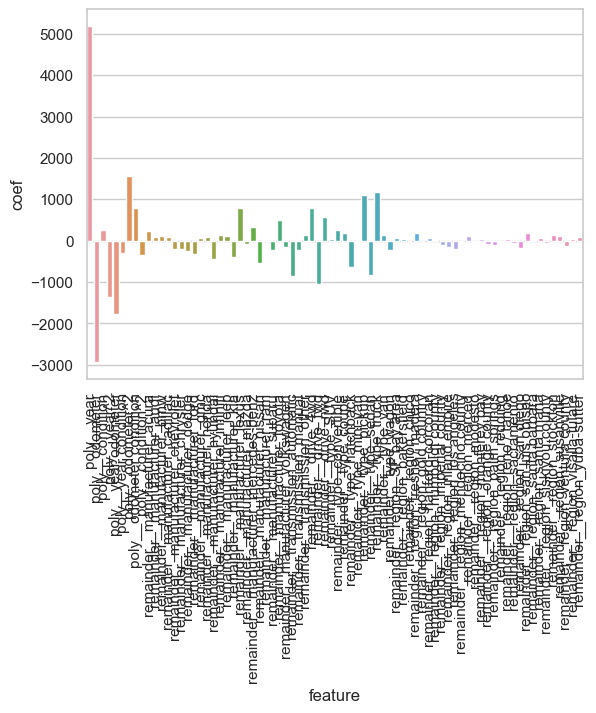

In [147]:
#plotting all the features
ax= sns.barplot(data=features,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


                            feature         coef     coef_abs  percentage
0                        poly__year  5181.870542  5181.870542    0.169735
1                    poly__odometer -2936.256707  2936.256707    0.096179
2               poly__year odometer -1774.413623  1774.413623    0.058122
3                  poly__odometer^2  1568.036311  1568.036311    0.051362
4                      poly__year^2 -1349.793257  1349.793257    0.044213
..                              ...          ...          ...         ...
71        remainder__region_redding   -20.996657    20.996657    0.000688
72  remainder__region_santa barbara    19.532941    19.532941    0.000640
73   remainder__region_gold country   -18.915544    18.915544    0.000620
74      remainder__manufacturer_ram    15.276332    15.276332    0.000500
75          remainder__region_chico    -6.748975     6.748975    0.000221

[76 rows x 4 columns]


<Axes: xlabel='feature', ylabel='percentage'>

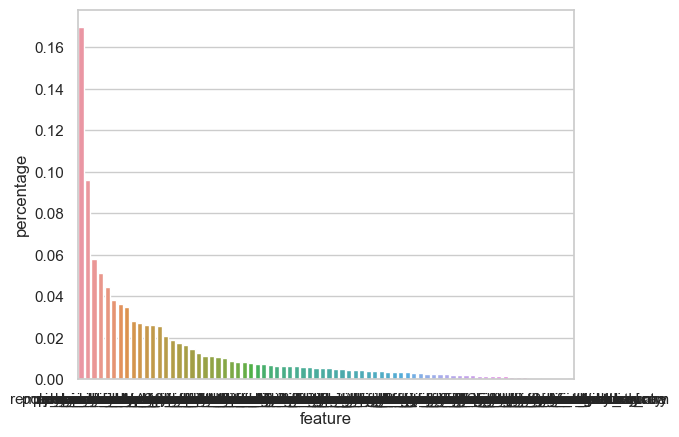

In [148]:
#sorting the feature set so that they will be plotted by relative importance
#show positive and negative together
features['coef_abs'] = np.abs(features['coef'])

features_sorted = features.sort_values(by=['coef_abs'],ascending=False).reset_index(drop=True)

#find the percentage of the total importance of a given feature in the model
features_sorted['percentage'] = features_sorted['coef_abs']/(features_sorted['coef_abs'].sum())

print(features_sorted)
sns.barplot(data=features_sorted,x='feature',y='percentage')

[Text(0, 0, 'year'),
 Text(1, 0, 'odometer'),
 Text(2, 0, 'year odometer'),
 Text(3, 0, 'odometer^2'),
 Text(4, 0, 'year^2'),
 Text(5, 0, 'type_truck'),
 Text(6, 0, 'type_pickup'),
 Text(7, 0, 'drive_fwd'),
 Text(8, 0, 'transmission_automatic'),
 Text(9, 0, 'type_sedan'),
 Text(10, 0, 'drive_4wd'),
 Text(11, 0, 'manufacturer_lexus'),
 Text(12, 0, 'odometer condition'),
 Text(13, 0, 'type_hatchback'),
 Text(14, 0, 'drive_rwd'),
 Text(15, 0, 'manufacturer_nissan'),
 Text(16, 0, 'manufacturer_toyota'),
 Text(17, 0, 'manufacturer_hyundai'),
 Text(18, 0, 'manufacturer_kia'),
 Text(19, 0, 'manufacturer_mercedes-benz'),
 Text(20, 0, 'condition^2'),
 Text(21, 0, 'manufacturer_ford'),
 Text(22, 0, 'year condition'),
 Text(23, 0, 'type_convertible'),
 Text(24, 0, 'condition'),
 Text(25, 0, 'manufacturer_dodge'),
 Text(26, 0, 'manufacturer_acura'),
 Text(27, 0, 'type_wagon'),
 Text(28, 0, 'transmission_manual'),
 Text(29, 0, 'manufacturer_subaru'),
 Text(30, 0, 'manufacturer_chrysler'),
 Text(31,

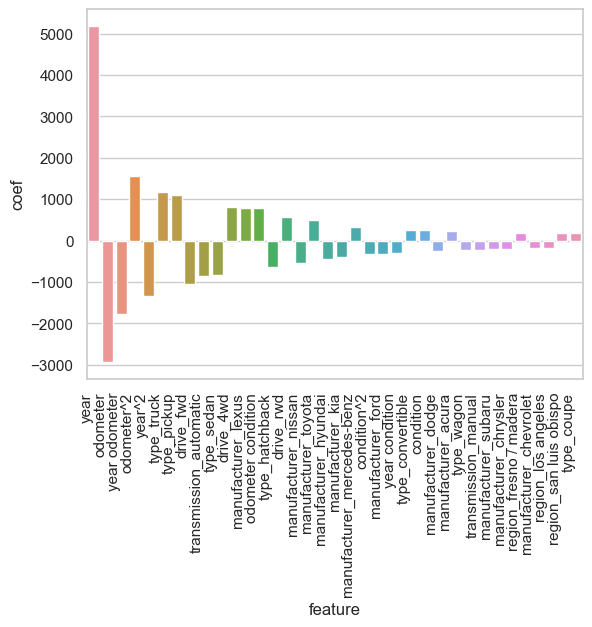

In [149]:
#plotting only the top 90 percent of most important features
features_sorted['cumsum']=features_sorted['percentage'].cumsum()
features_sorted_filter = features_sorted.loc[features_sorted['cumsum']<=0.9]
features_sorted_filter['feature'] = features_sorted_filter['feature'].str.replace('poly__', '').str.replace('remainder__','')

ax = sns.barplot(data=features_sorted_filter,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


The training MSE of this model is: 12076566.708150743
The test MSE of this model is: 12428841.510508718
The training MAE of this model is:2625.3638379374647


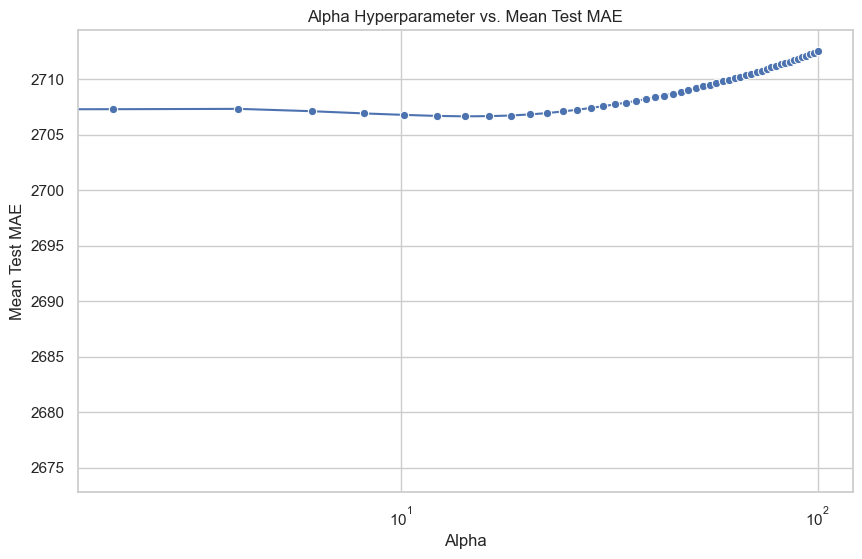

In [150]:
#applying a ridge regression type with grid search cv to compare to the lasso regression model

#order of the specified columns
degree_in = 2
poly_columns = ['year','odometer','condition']

preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=degree_in, include_bias=False), poly_columns)
    ],
    remainder='passthrough'
)

#rdige regression pipeline object with a standard scaler and using negative mean absolute error for optimization
ridge_pipe = Pipeline([
    ('pre_processor',preprocessor),
    ('scaler',StandardScaler()),
    ('ridge',Ridge())
])


#testing 50 hyperparmeter values for alpha from 0 to 100
param_dict = {'ridge__alpha':np.linspace(0,100,50)}

#determining best value for alpha
ridge_grid = GridSearchCV(estimator=ridge_pipe,
                         param_grid=param_dict,
                         scoring='neg_mean_absolute_error',
                         cv=5)
ridge_grid.fit(X_train,y_train)

train_mse = mean_squared_error(y_train,ridge_grid.predict(X_train))
test_mse = mean_squared_error(y_test,ridge_grid.predict(X_test))
train_MAE = mean_absolute_error(y_train,ridge_grid.predict(X_train))

#printing the output of the results to determine modelling quality
print(f'The training MSE of this model is: {train_mse}')
print(f'The test MSE of this model is: {test_mse}')
print(f'The training MAE of this model is:{train_MAE}')

#applying the best estimator model
best_estimator = ridge_grid.best_estimator_
best_model = ridge_grid.best_estimator_.named_steps['ridge']

#print(best_model.coef_)

# Store the grid search results in a DataFrame
results = pd.DataFrame({'alpha': ridge_grid.cv_results_['param_ridge__alpha'],
                        'mean_test_mse': -ridge_grid.cv_results_['mean_test_score']})

# line plot of the hyperparameter and the correspoinding error metric
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='alpha', y='mean_test_mse', data=results, marker='o')
plt.title('Alpha Hyperparameter vs. Mean Test MAE')
plt.xlabel('Alpha')
plt.ylabel('Mean Test MAE')
plt.xscale('log')  
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


## Unfortunately I modelled and itteratively approached my evaluation process in the model creation section of this project.
### Here are the key findings of this process:
1. The L1 and L2 regression types gave similar MSE and MAE values with and without the usage of the gridsearch cv object
2. it was necessary to remove the state column from the data to reduce dimensionality, however it was also necessary to filter the data to a target state to be able to incorporate the region data. Thie yielded a higher quality model though this would need to be applied again should the client wish to determine the value of a vehicl in a nother state.
    -reducing the state inputs also improved the model accuracy substantially from and MSE 0f 310_000_000 to approximately 120_000_000
3. Reducing the dimensionality of the final models by only applying PolynomialFeatures to the quantitative columns gave similar results as when applying polynomial features to all columns, this greatly reduces the computational time period with minimal effect on the quality of the final model.
4. using a k-fold approach on determining the best model had minimal impact on the final model quality as compared to the standard approach of training and test data, this was employed despite the marginal increasse in performance as it did not cause too much extra computational time.
5. using a gridsearch object to determine the best polynomial degree hyperparemeter did not add value in this model and reducing the degree to 2 yielded results that were comparable to higher order models

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Checking on the effect of the different brands in the model
observing this initial data indicates that the specific brands have different effects on the sale price
this would be useful to collect further data on the type of vehicle such as "luxury" or not, or the original sales price of 
it is clear from the regression that the model indicates the various brands have different effects on value and as would be
expected the trustworthy toyota is high on the list while luxury vehicles such as lexus, 
mercedes and bmw are also high on the
list

Text(0.5, 1.0, 'Car Brands Effect on Price in Model')

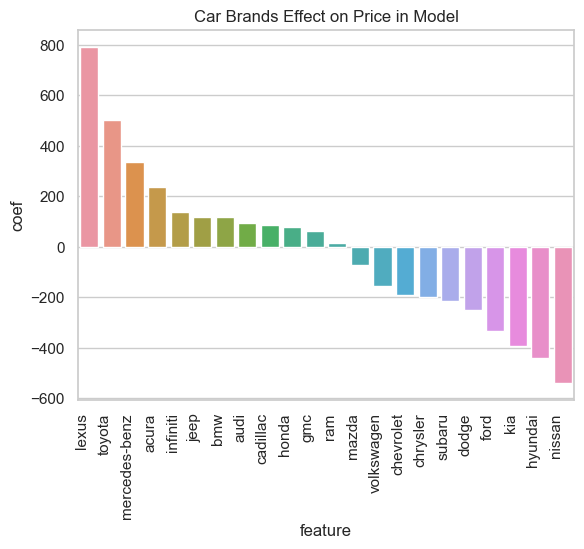

In [151]:
#determining which brands are best and worst
brand_coef = features_sorted[features_sorted['feature'].str.contains('manufacturer')]
brand_coef = brand_coef.sort_values(by=['coef'],ascending=False).reset_index(drop=True)
brand_coef['feature'] = brand_coef['feature'].str.replace('remainder__manufacturer_','')
ax = sns.barplot(data=brand_coef,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Car Brands Effect on Price in Model')

### Checking on the effect of the regions on the outcome of the model
the region within california indicates a smaller effect on the sale value of the vehicle than the manufacturer although
it does appear to have some impact, if the salesperson can sell the vehicle at multiple locations across CA
it would be a good idea to try to sell them at the locations with larger values for coef and avoiding sales at locations such
as LA, though this would benefit from more data input such as initial value relative to mean car price of a cars release year
since this would give a better indication on the "Value" of a car, i.e., factors such as whether luxury vehicles are sold in the area or not

Text(0.5, 1.0, 'CA region effect on the car sales value.')

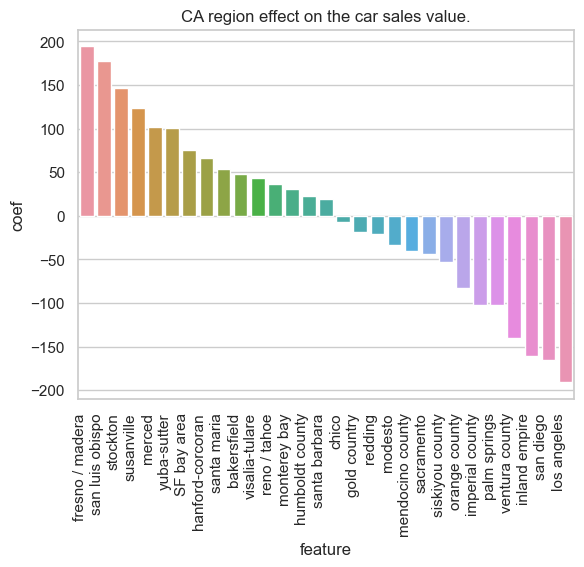

In [152]:
#determining which regions are best and worst
region_coef = features_sorted[features_sorted['feature'].str.contains('region')]
region_coef = region_coef.sort_values(by=['coef'],ascending=False).reset_index(drop=True)
region_coef['feature'] = region_coef['feature'].str.replace('remainder__region_','')

ax = sns.barplot(data=region_coef,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('CA region effect on the car sales value.')

### Effect of vehicle type on the price of a sold vehicle
From the following graph it can be seen that the selling trucks and pickups clearly has the highest effect on sale value
though this may be due to the high initial cost of these vehicles, again information on the initial value of the vehicles
would be extremelly useful in further refining this model.
This would also suggest that second order combinations of factors may be at play e.g., 
selling a truck in fresno would have the 
highest value, though this would cause the model dimensionality to increase substantially.

Text(0.5, 1.0, 'Vehicle type effect on the car sales value.')

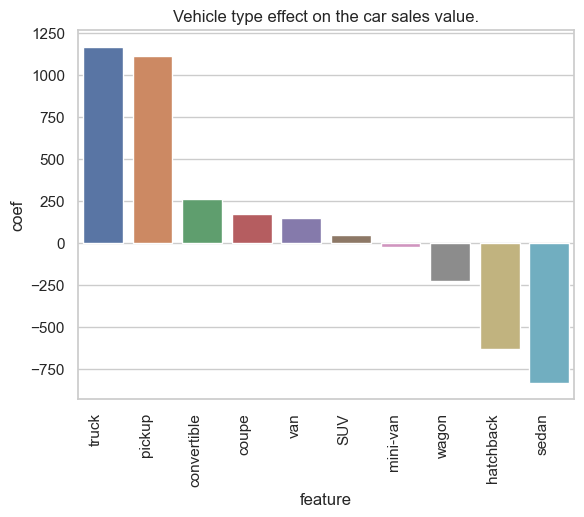

In [153]:
#determining which types are best and worst
type_coef = features_sorted[features_sorted['feature'].str.contains('type')]
type_coef = type_coef.sort_values(by=['coef'],ascending=False).reset_index(drop=True)
type_coef['feature'] = type_coef['feature'].str.replace('remainder__type_','')

ax = sns.barplot(data=type_coef,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Vehicle type effect on the car sales value.')

## Determining the effecto car year, odometer value and condition
From this graphical output this shows the following:
1. The age of the vehicle has the largest impact on the selling price of the car, in other words, newer cars hae the highest resale value
2. The second most important factor to look for when determining the resale value of the car is the odometer reading, with this factor also being coupled to the year the car was manufactured, this means that cars that are newer but have higher odometer readings will have relatively lower resale value than older vehicles with lowerodometer readings.
3. Car condition did not has as high an impact on the final resale value of the vehicle with this metric not being found in the top %75 of modelled coefficients, in other words this had less than 25% effect at most on the final sale value of the vehicle.

Text(0.5, 1.0, 'Top Coefficients determining the price of a vehicle')

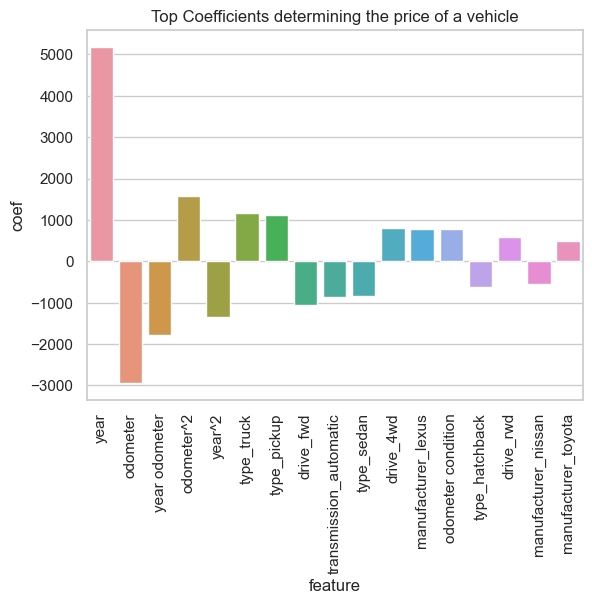

In [158]:
#plotting only the top 90 percent of most important features
features_sorted['cumsum']=features_sorted['percentage'].cumsum()
features_sorted_filter = features_sorted.loc[features_sorted['cumsum']<=0.75]
features_sorted_filter['feature'] = features_sorted_filter['feature'].str.replace('poly__', '').str.replace('remainder__','')

ax = sns.barplot(data=features_sorted_filter,x='feature',y='coef')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top Coefficients determining the price of a vehicle')



### Final comments on implementing the model
As can be seen throughout the modelling efforts, multiple assumptions were made on where the client wishes to sell vehicles and what type of vehicle they would want to sell. This model may be further refined by determining the following:
1. The brands of vehicle that the salesperson wishes to sell.
2. Region of potential sale if only a single region.
3. Whether the salesperson sells or doesnt sell electric, hybrid, dieasel or petrol vehicles.
4. The size of the vehicles thaat the salesperson wishes to sell 
If these factors can be determined, a more accurate model can be created to pinpoint the porjected price of the vehicle.
Currently the models developed are able to determine the car price with the given inputs discussed in the data preperation section (which no salesperson would read through) to an absolute average error value of approximately 2700 which is rather high when observing that the mean car sale value was 15,000 for the entire data set, so refining the model with the help of more information on requirements from the customer woud be beneficial.